Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "ariunaK"

---

# Часть I. Односторонние разностные схемы

Напишите функцию `deriv`, которая вычисляет производную функции в заданной точке $x$, используя одностороннюю разностную схему с заданным шагом $h$ и степенью аппроксимации $O(h^2)$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def deriv(f, x, h):
    """ Вычисляет производную `f` в точке `x` с шагом `h`.
    Вычисляет производную, используя односторонню разностную схему со степенью аппроксимации $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        Функция, которую нужно продифференцировать
    x : float
        Точка, в которой нужно дифференцировать функцию
    h : float
        Шаг
        
    Rerurns
    -------
    fder : производная f(x) в точке x с шагом h.
    """
    # YOUR CODE HERE
    a = np.array([[1, 1, 1], [0, 1, 2], [0, 1, 4]])
    b = np.array([0, 1, 0])
    c = np.linalg.solve(a, b)
    n = c[0] * f(x) + c[1] * f(x + h) + c[2] * f(x + 2 * h)
    fder = n / h
    return fder


#### Тест I.1

Проверьте ваш алгоритм на простом примере: продифференцируйте $f(x) = x^3$ в точке $x=0$. Прокомментируйте, совпадает ли результат с ожидаемым $f'(x) = 0$ при стремлении $h\to 0$.

In [3]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))


0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


погрешность уменьшается при стремлении к нулю и равна $O(h^2)$.

### Тест I.2

Теперь попробуйте немного более сложную функцию $f(x) = x^2 \log{x}$. Оцените значение производной в точке $x=1$, используя *двухточечную* и *трехточечную* схемы. Для обеих схем оцените значение $h$, при котором ошибка перестанет падать.

In [4]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

In [14]:
# YOUR CODE HERE
def two_der(x, h):
    dx = x + h - x
    n = f(x + h) - f(x)
    d = dx
    fder = n / d
    return fder


def three_der(x, h):
    a = np.array([[1, 1, 1], [0, 1, 2], [0, 1, 4]])
    b = np.array([0, 1, 0])
    c = np.linalg.solve(a, b)
    n = c[0] * f(x) + c[1] * f(x + h) + c[2] * f(x + 2 * h)
    fder = n / h
    return fder


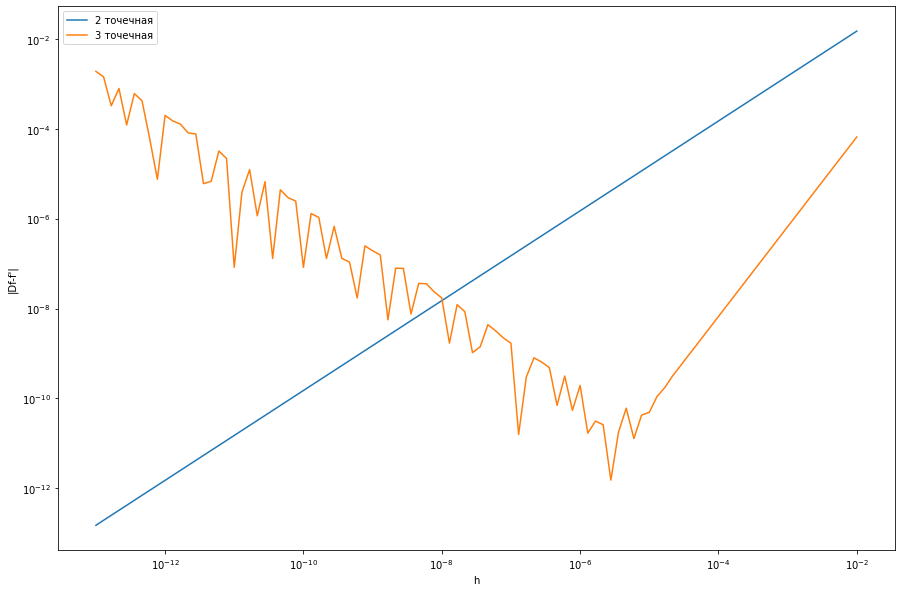

In [15]:
x = 1
h_arr = np.logspace(-13, -2, num=100)
df_forward_arr2 = np.array([])
df_forward_arr3 = np.array([])

for h in h_arr:
    df_forward_arr2 = np.append(df_forward_arr2, np.abs(two_der(x, h) - fder(x)))
    df_forward_arr3 = np.append(df_forward_arr3, np.abs(three_der(x, h) - fder(x)))
    
plt.figure(figsize = (15, 10))
plt.loglog(h_arr, df_forward_arr2, '-', label = '2 точечная')
plt.loglog(h_arr, df_forward_arr3, '-', label = '3 точечная')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()

Ошибка:

$\epsilon_r \sim \epsilon_f |\frac{f(x)}{h}|$

if relative accuracy of $f(x)$ is $\epsilon_f$

Total error:

$\epsilon_t = \epsilon_r+\epsilon_f \sim \epsilon_f |\frac{f(x)}{h}| + f''(x)h \leftarrow$ linearization error

минимум ошибки для 2 точечной: $d\epsilon_t/dh=0$

$\rightarrow h_{opt} \sim \sqrt{\frac{\epsilon_f f}{f''}} \sim \sqrt{\epsilon_f} \sim 10^{-8}$


для 3 точечной:

$\rightarrow h_{opt} \sim  \epsilon_f^{1/3} \sim 10^{-6}$



### Тест I.3 

Теперь продифференцируйте $x^2 \log(x)$ в $x=0$. Используйте трехточечную схему. Заметьте, что в нуле функцию нужно доопределить явным образом. Постройте зависимость ошибки от величины шага $h$. Объясните полученные результаты.



In [7]:
def f(x):
    if x == 0:
        # предел $x^2 log(x)$ при $x-> 0$ равен нулю, хотя log(x) не определен в x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05


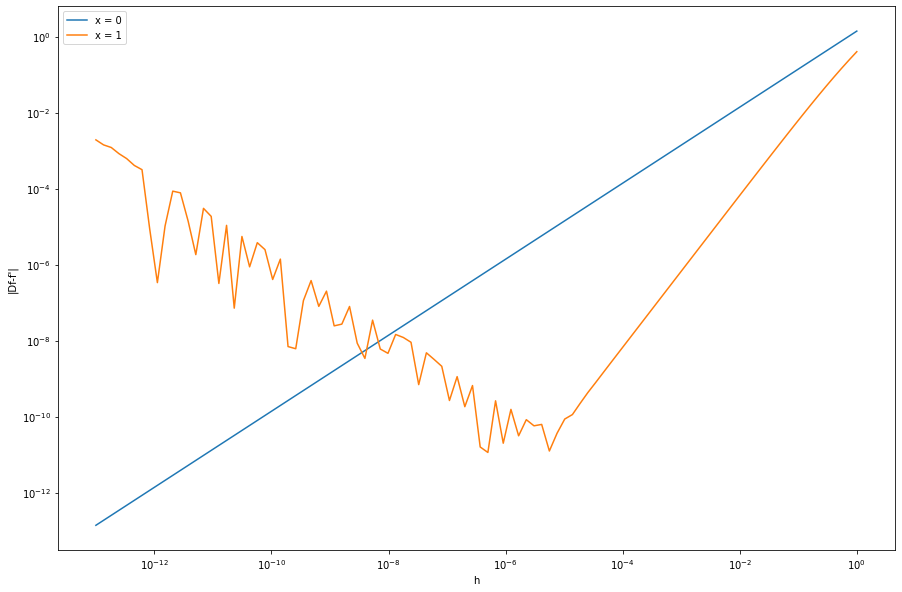

In [8]:
# YOUR CODE HERE
x = 0
x1 = 1
h_arr = np.logspace(-13, 0, num=100)
df_forward_arr = np.array([])
df_forward_arr_c = np.array([])

for h in h_arr:
    df_forward_arr = np.append(df_forward_arr, np.abs(deriv(f, x, h) - fder(x)))
    df_forward_arr_c = np.append(df_forward_arr_c, np.abs(deriv(f, x1, h) - fder(x1)))
    
plt.figure(figsize = (15, 10))
plt.loglog(h_arr, df_forward_arr, '-', label = f'x = {x}')
plt.loglog(h_arr, df_forward_arr_c, '-', label = f'x = {x1}')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.legend()
plt.show()

при x = 0 ошибка линейна, так как в питоне присутсвует ошибка округения при маленьких значениях.

# Часть II. Midpoint rule

Напишите функцию, вычисляющую определенный интеграл, используя midpoint rule, с точностью до заданной погрешности $\epsilon$. Оценивайте ошибку, сравнивая значения интеграла для $N$ и $2N$ элементарных интервалов.

In [16]:
def midpoint_rule(func, a, b, eps):
    """ Вычисляет интеграл f от a до b используя правило центральной точки.
    
    Parameters
    ----------
    func : callable
        Функция, которую нужно проинтегрировать
    a : float
        Нижний предел интегрирования
    b : float
        Верхний предел интегрирования
    eps : float
        Ожидаемая ошибка оценки
        
    Returns
    -------
    integral : float
        Оценка интеграла $\int_a^b f(x) dx$.
    n : int
        The number of intervals on segment.
    """
    # YOUR CODE HERE
    n = 1
    h = (b - a) / n
    I_n = func((a + b) / 2) * h
    c = (a + b) / 2
    I_2n = (func((a + c) / 2) + func((c + b) / 2)) * h / (2 * n)
    while abs(I_2n - I_n) >= eps:
        n += 1
        h = (b - a) / n
        I_n = 0
        I_2n = 0
        for i in range(n):
            I_n += h * (func((i + 0.5) * h))
            I_2n += h / 2 * (func((i + 0.5) * (h / 2)))

    integral = I_n 
    return integral, n

### Тест II.1

Протестирутйте ваш алгоритм на простом интеграле, который вы можете посчитать аналитически.

Сравните скорость сходимости с ожидаемой $O(N^{-2})$ в зависимости от количества интервалов, необходимых для заданной точности $\epsilon$.

Сравните полученный результат с ответом, вычисленным "руками". Попадает ли результат в интервал заданной ошибки?

(20% итоговой оценки)


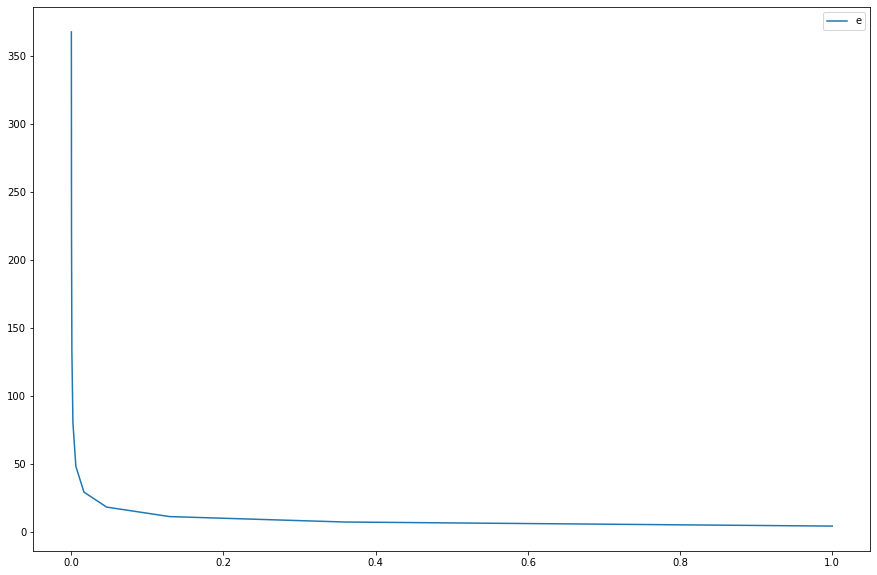

I =  71.98685171658146 N = 37


In [44]:
# YOUR CODE HERE
def func(x): return x**2
eps_arr = np.logspace(-4,0, num = 10)
I_arr = np.array([])
for eps in eps_arr:
    I_arr = np.append(I_arr, midpoint_rule(func, 0, 6, eps)[1])

plt.figure(figsize = (15, 10))
plt.plot(eps_arr, I_arr, '-', label = 'e')
plt.legend()
plt.show()
print('I = ', midpoint_rule(func, 0, 6, 0.01)[0], 'N =', midpoint_rule(func, 0, 6, 10**(-2))[1] )

 Скорость сходимости = ожидаемой. Результат не попадает в интервал заданной ошибки. I = 72, полученный результат = 71.9868517

## Тест II.2

Используя ваш алгоритм, посчитайте значение

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

с точностью до $\epsilon=10^{-4}$.

Заметим, что интеграл содержит интегрируемую особенность в нижнем пределе. Выполните вычисление двумя способами: во первых, посчитайте интеграл "в лоб", во вторых, вычтите особенность из подынтегрального выражения. Сравните количество необходимых итераций для достижения заданной точности $\epsilon$.

(30% итоговой оценки)

In [29]:
# YOUR CODE HERE
def func(x): return 2 * np.sin(x) / x
print('I =', midpoint_rule(func, 0, 1, 10**(-4))[0], 'N =', midpoint_rule(func, 0, 1, 10**(-4))[1] )

def func1(x): return 2 + np.sin(np.sqrt(x)) / x - 1 / np.sqrt(x)
print('I =', midpoint_rule(func1, 0, 1, 10**(-4))[0], 'N =', midpoint_rule(func1, 0, 1, 10**(-4))[1] )

I = 1.8922941998480554 N = 14
I = 1.8920193180026728 N = 16


In [37]:
eps_arr = np.logspace(-7,0, num = 10)
eps_arr

array([1.00000000e-07, 5.99484250e-07, 3.59381366e-06, 2.15443469e-05,
       1.29154967e-04, 7.74263683e-04, 4.64158883e-03, 2.78255940e-02,
       1.66810054e-01, 1.00000000e+00])

В первом случае необходимо меньше шагов для достижения заданной точности  $\epsilon$.

# Часть  III 


Вычислите определённый интеграл **методом трапеций**  с вычитанием сингулярности

$$
I = \int_{0}^{1}\frac{e^x}{\sqrt{x(1-x)}}dx.
$$

Преобразуйте данный интеграл, вычитая сингулярности. Выпишите расчетные формулы.

Вам могут пригодиться значения следующих определенных интегралов:

$$
\int_0^1 \frac{1}{\sqrt{x (1-x)}} \, dx=\pi,\quad \int_0^1 \frac{x}{\sqrt{x (1-x)}} \, dx=\pi/2.
$$

YOUR ANSWER HERE

Cоставьте функцию, возвращающую значение интеграла методом трапеций.

In [ ]:
def integ(npts=10):
    """Compute the value of the integral above.
    
    Subtract the singularities and use the trapezoid rule. 
    
    Parameters
    ----------
    npts : int
        The number of points for the trapezoid rule
        
    Returns
    -------
    I : float
       The computed value of the integral
    """


In [ ]:
# this is a test to check your computed value
from numpy.testing import assert_allclose
